In [2]:
#import all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [3]:
# import the data set
df = pd.read_csv("lego.csv")

# view DataFrame
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


The basic summary of the data set and shows that there are 12,261 rows and six columns of data. The columns have either float or integer same data type, so these are all numerical values, and the total number of entries is defined as 12,261 and all columns have 12,261 non-null values, which means there are no null values in the data set.  

In [5]:
df.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


When the describe() function is used to gain more insights from the data:

** for 'list_price', 'num_reviews' and 'piece_count' the max values are very high when compared to the mean and quartile figures:

list_price: 75% of the values are <=70.19, the max is 1104.87

piece_count: 75% of the values are <=544, the max is 7541

num_reviews: 75% of the values are <=11, the max is 367

With a simple calculation we could point out the possible outliers: 
Multiply the interquartile range (IQR) by 1.5 and add 1.5 (IQR) to the third quartile. 
Any number greater than this is a suspected outlier.

For list_price, possible outliers lie above --> (70.19-19.99)X1.5+70.19=145.49

For piece_count, possible outliers lie above --> (544-97)x1.5+544=1215.5

'num_reviews' will not be used in this analysis.

** definition of 'country' is number of countries the product is sold in. Hence it shouldn't take the value zero. However, the min field shows that there are rows where country value equals to zero. Similar to 'num_reviews', 'country' will not be used in this analysis hence I choose to leave it as is.

In [6]:
# distribution of list_price - check skewness
list_price_without_outliers = df[df['list_price'] <= 145.49]

<AxesSubplot:xlabel='list_price', ylabel='Count'>

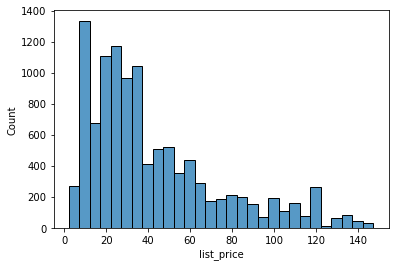

In [7]:
sns.histplot(data=list_price_without_outliers, x="list_price", binwidth=5)

List_price data is right - skewed: A positive skew indicates that more values lie below the mean and the distribution has a 'tail' which extends towards the higher values.

In [8]:
# distribution of piece_count - check skewness
piece_count_without_outliers = df[df['piece_count'] <= 1215.5]

<AxesSubplot:xlabel='piece_count', ylabel='Count'>

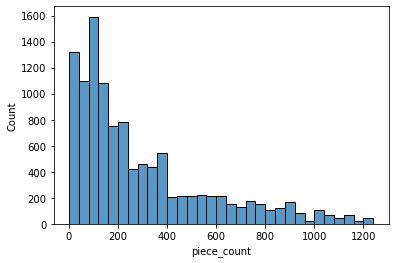

In [9]:
sns.histplot(data=piece_count_without_outliers, x="piece_count", binwidth=40)

Piece_count data is right - skewed: A positive skew indicates that more values lie below the mean and the distribution has a 'tail' which extends towards the higher values.

<AxesSubplot:xlabel='piece_count', ylabel='list_price'>

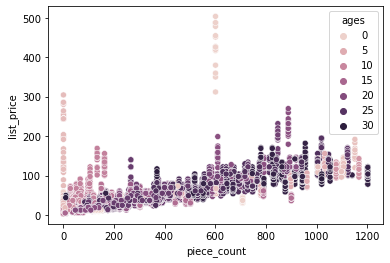

In [10]:
# check linearity with a scatterplot 
sns.scatterplot(x="piece_count", y="list_price", hue="ages", data=piece_count_without_outliers)

There seems to be a positive linear correlation between the two data sets with no specific emphasis on 'age'. 

In [103]:
# Simple Linear Regression

In [37]:
# choose your variables
x = df["piece_count"].values.reshape(-1, 1) 
y = df["list_price"].values 

Splitting the data before building the model is a general technique used in machine learning that allows data analysts to evaluate the performance of their models. It allows to simulate how a model would perform on new/unseen data. This is helpful on matters of machine learning models to guard against over-fitting:

In [38]:
# split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [39]:
# run linear regression
lr = LinearRegression()

In [40]:
# fit the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

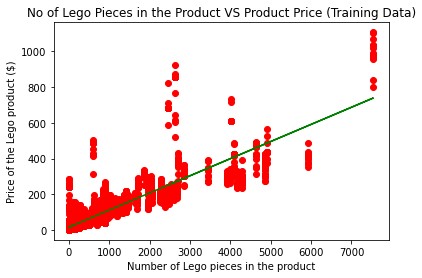

In [41]:
# training - Visualization
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("No of Lego Pieces in the Product VS Product Price (Training Data)")
plt.xlabel("Number of Lego pieces in the product")
plt.ylabel("Price of the Lego product ($)")

plt.show()

In [42]:
# training the model using the 'statsmodel' OLS library
model = sm.OLS(y_train, sm.add_constant(x_train)).fit() # fit the model with the added constant 
Y_pred = model.predict(sm.add_constant(x_train)) # set the predicted response vetor
print_model = model.summary() # call a summary of the model

print(print_model) # print the summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 2.615e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        03:41:44   Log-Likelihood:                -44880.
No. Observations:                8582   AIC:                         8.976e+04
Df Residuals:                    8580   BIC:                         8.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6348      0.567     31.077      0.0

In [43]:
# print the R-squared value
print(lr.score(x_train,y_train))

0.7529271656910888


In [44]:
# print Intercept and Coefficient
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

Intercept value:  17.634791702797614
Coffecient value:  [0.09553496]


Train data results:

This can be interpreted as nearly a strong R-squared value, as it is higher than 0.7, and it explains almost 75% of the dependent variable.

Y intercept: the predicted value of y, the dependent variable (Lego prices) when the independent variables each have a zero value.

The coefficient value tells us that each additional lego piece is associated with an increase in the product price of $0,1 (10 cent).

In [58]:
# prediction of test set
y_pred_lr = lr.predict(x_test)

Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred_lr with y_test values to check how accurate our predicted values are.

In [46]:
# predicted value
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [56.99519357 24.22670367 30.81861563 ... 28.62131164 36.83731786
 26.61507757]


In [47]:
# actual value
y_test

array([77.9922, 13.986 , 19.4922, ..., 24.3878, 24.3878, 25.398 ])

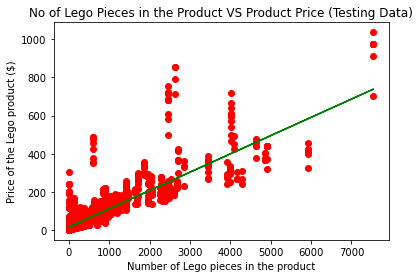

In [55]:
# testing - Visualisation
plt.scatter(x_test, y_test, color = "red")  # y_test --> actual value
plt.plot(x_test, lr.predict(x_test), color = "green")  # lr.predict(x_test) --> predicted value
plt.title("No of Lego Pieces in the Product VS Product Price (Testing Data)")
plt.xlabel("Number of Lego pieces in the product")
plt.ylabel("Price of the Lego product ($)")

plt.show()

In [52]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, lr.predict(x_test))

21.05813259108558

Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. 

In [56]:
# Make predictions: price of lego product with 8000 pieces
def calc(slope, intercept, lego_pieces):
    return slope*lego_pieces+intercept

score = calc(0.09553496, 17.634791702797614, 8000)
print(score)

781.9144717027976


In [61]:
# Multiple Linear Regression

In [62]:
# dependent variable
y = df["list_price"] 

# independent variable
X = df[["piece_count", "ages"]] 

In [63]:
# create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [64]:
multi = LinearRegression()  
multi.fit(x_train, y_train)

LinearRegression()

In [74]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.7681985466459664
Intercept:  16.98559674920356
Coefficients:


[('piece_count', 0.09569755116044477), ('ages', 0.02987278094702085)]

R squared: it represents the proportion of the variation in the dependent variable, which can be explained by the independent variables in our model. Roughly 77% of the variation in Lego prices can be explained using this data set with pieces and ages variables.

Y intercept: the predicted value of y, the dependent variable (Lego prices) when the independent variables each have a zero value.

Coefficients: 0.0957 would be the increase in the value of a Lego product with that additional piece. 
0.02987 would be the increase in the value of a Lego product with that additional age. These coefficients represent the sensitivity of the dependent variable to unit changes in the respective independent variable.  

In [68]:
# training the model using the 'statsmodel' OLS library
model = sm.OLS(y_train, sm.add_constant(x_train)).fit() # fit the model with the added constant 
Y_pred = model.predict(sm.add_constant(x_train)) # set the predicted response vector
print_model = model.summary() # call a summary of the model

print(print_model) # print the summary

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        04:18:30   Log-Likelihood:                -44428.
No. Observations:                8582   AIC:                         8.886e+04
Df Residuals:                    8579   BIC:                         8.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.9856      1.107     15.341      

the standard error: basically the smaller, the better. So small standard errors mean precise estimates of these parameters

T (test) statistics: these are computed as the estimated coefficient divided by its corresponding standard error. T statistics can be used to test the statistical significance of our two independent variables. The smaller the standard error, i.e. the more precise the perimeter estimates are, then other things equal, the larger the T values would be. 

P values: the probability of the test statistic value or a more extreme value. There's an inverse relationship between the T value and the P value. We interpret P values by comparing them to a significant level 5%. P value for the 'ages' variable is greater than 0.05.  

confidence interval: When we check the confidence interval for 'ages', we see that the interval includes zero, which is consistent with our doubt in rejection of the null hypothesis in this case (The null hypothesis states that all coefficients in the model are equal to zero). We can conclude that the true coefficient of 'ages' variable is equal to zero. 'Ages' variable do not have a statistically significant relationship with the response variable (price).  

In [69]:
# prediction of test set
y_pred_multi = multi.predict(x_test)

Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred_lr with y_test values to check how accurate our predicted values are.

In [70]:
# predicted value
print("Prediction for test set: {}".format(y_pred_multi))

Prediction for test set: [ 70.24049908 147.63046845  28.37916128 ...  18.21142729  77.07705641
  69.82175689]


In [71]:
# actual value
y_test

5383      65.8800
11481    179.7971
4192      23.9520
2992     101.3922
5767      48.7878
           ...   
9180      85.3878
3814      40.6980
2872       3.8922
6366      97.5390
9328      67.0878
Name: list_price, Length: 3679, dtype: float64

In [72]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, multi.predict(x_test))

21.636188032626283

Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. 

In [73]:
# Make predictions: price of lego product with 8000 pieces that are most likely to be purchased by 30 year olds
New_Value1 = 8000
New_Value2 = 29
print ('Predicted Value: \n', multi.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [783.43231668]


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


If we were looking at a lego set with these attributes, these characteristics, then there is the predicted value. 

Conclusion: number of lego pieces have a statistically significant relationship with the lego price. Age variable doesn't contribute much in explaining the price differences. Other variables (such as rating) can be added to the model and tested for significance.  